In [1]:
from apps.twodimensional.shallowwatermomentequations import shallow_water_moment_equations as swme
from apps.twodimensional.shallowwaterlinearizedmomentequations import shallow_water_linearized_moment_equations as swlme
from apps.twodimensional.shallowwaterlinearizedmomentequations.smoothexample import smooth_example as swlme_se
from pydogpack import main
from pydogpack.tests.utils import utils
from pydogpack.timestepping import explicit_runge_kutta
from pydogpack.utils import dg_utils
from pydogpack.utils import math_utils
from pydogpack.utils import x_functions
from pydogpack.utils import xt_functions
from pydogpack.visualize import plot
from pydogpack.mesh import mesh
from pydogpack.basis import basis
from pydogpack.utils import io_utils

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation
matplotlib.rcParams['figure.figsize'] = [10, 10]

from IPython.display import HTML

# Smooth Example

## Cartesian Mesh

In [11]:
num_moments = 1
gravity_constant = 1.0
kinematic_viscosity = 0.0
slip_length = 0.0

problem = swlme_se.SmoothExample( 
    num_moments, 
    gravity_constant, 
    kinematic_viscosity, 
    slip_length
)

time_final = 0.5
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

space_time_order = 2
problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["is_verbose"] = True
problem.parameters["time_stepping"]["num_frames"] = 10
problem.parameters["time_stepping"]["order"] = space_time_order

x_left = -1.0
x_right = 1.0
y_bottom = -1.0
y_top = 1.0
num_rows = 20
num_cols = 20
problem.parameters["mesh"]["mesh_class"] = "mesh_2d_cartesian"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right
problem.parameters["mesh"]["y_bottom"] = y_bottom
problem.parameters["mesh"]["y_top"] = y_top
problem.parameters["mesh"]["num_rows"] = num_rows
problem.parameters["mesh"]["num_cols"] = num_cols

problem.parameters["basis"]["basis_class"] = "legendre_2d_cartesian"
problem.parameters["basis"]["inner_product_constant"] = 0.25
problem.parameters["basis"]["space_order"] = space_time_order

problem.parameters["boundary_condition"]["boundary_condition_class"] = "extrapolation"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

cfl = 0.3
delta_x = (x_right - x_left) / num_cols
delta_y = (y_top - y_bottom) / num_rows
face_area = max(delta_x, delta_y)
elem_vol = delta_x * delta_y
delta_t = float(dg_utils.get_delta_t(cfl, problem.max_wavespeed, face_area, elem_vol))
problem.parameters["delta_t"] = delta_t

problem._setup_objects()

In [13]:
final_solution = main.run(problem)

10.0%
Will finish in 0:03:32.872284 at 13:21:09.802534
20.0%
Will finish in 0:03:15.392104 at 13:21:17.517904
30.0%
Will finish in 0:02:51.415762 at 13:21:18.157434
40.0%
Will finish in 0:02:24.771850 at 13:21:14.564191
50.0%
Will finish in 0:02:00.470811 at 13:21:14.219396
60.0%
Will finish in 0:01:36.394825 at 13:21:14.264837
70.0%
Will finish in 0:01:12.760518 at 13:21:15.812834
80.0%
Will finish in 0:00:49.718754 at 13:21:21.871546
90.0%
Will finish in 0:00:25.156879 at 13:21:24.846564
100.0%
Will finish in 0:00:00 at 13:21:28.033023


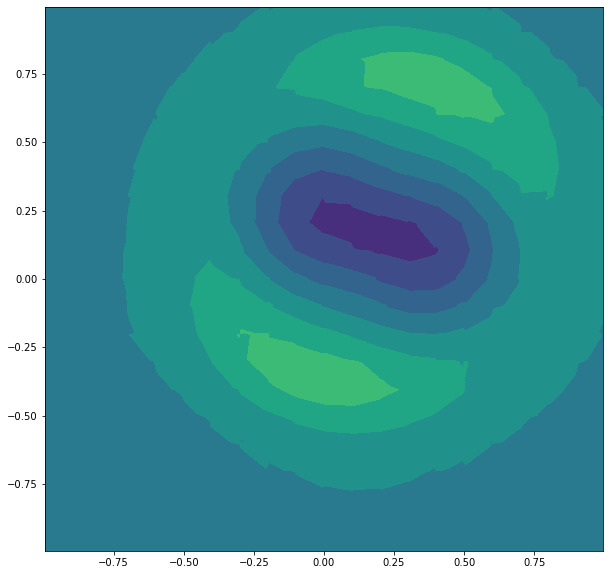

In [18]:
ani, fig = plot.create_animation_output_dir(problem.output_dir, eqn=4);
HTML(ani.to_html5_video())

## Unstructured Mesh

In [2]:
num_moments = 0
gravity_constant = 1.0
kinematic_viscosity = 0.0
slip_length = 0.0

problem = swlme_se.SmoothExample( 
    num_moments, 
    gravity_constant, 
    kinematic_viscosity, 
    slip_length
)

time_final = 0.5
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

space_time_order = 1
problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["is_verbose"] = True
problem.parameters["time_stepping"]["num_frames"] = 10
problem.parameters["time_stepping"]["order"] = space_time_order

x_left = -1.0
x_right = 1.0
y_bottom = -1.0
y_top = 1.0
num_rows = 20
num_cols = 20
problem.parameters["mesh"]["mesh_class"] = "mesh_2d_triangulated_rectangle"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right
problem.parameters["mesh"]["y_bottom"] = y_bottom
problem.parameters["mesh"]["y_top"] = y_top
problem.parameters["mesh"]["num_rows"] = num_rows
problem.parameters["mesh"]["num_cols"] = num_cols

problem.parameters["basis"]["basis_class"] = "modal_2d_triangle"
problem.parameters["basis"]["inner_product_constant"] = 0.5
problem.parameters["basis"]["space_order"] = space_time_order

problem.parameters["boundary_condition"]["boundary_condition_class"] = "dirichlet"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

cfl = 0.5
delta_x = (x_right - x_left) / num_cols
delta_y = (y_top - y_bottom) / num_rows
hypotonuse = np.sqrt(delta_x * delta_x + delta_y * delta_y)
face_area = max(delta_x, delta_y, hypotonuse)
elem_vol = 0.5 * delta_x * delta_y
delta_t = float(dg_utils.get_delta_t(cfl, problem.max_wavespeed, face_area, elem_vol))
problem.parameters["delta_t"] = delta_t

problem._setup_objects()

In [3]:
final_solution = main.run(problem)

10.0%
Will finish in 0:00:59.267349 at 19:17:31.793067
20.0%
Will finish in 0:00:49.553048 at 19:17:27.881767
30.0%
Will finish in 0:00:41.112965 at 19:17:24.673264
40.0%
Will finish in 0:00:34.450302 at 19:17:23.357627
50.0%
Will finish in 0:00:28.586405 at 19:17:23.113267
60.0%
Will finish in 0:00:22.470471 at 19:17:22.116634
70.0%
Will finish in 0:00:16.669248 at 19:17:21.504618
80.0%
Will finish in 0:00:10.998555 at 19:17:20.933231
90.0%
Will finish in 0:00:05.458535 at 19:17:20.525806
100.0%
Will finish in 0:00:00 at 19:17:20.155101


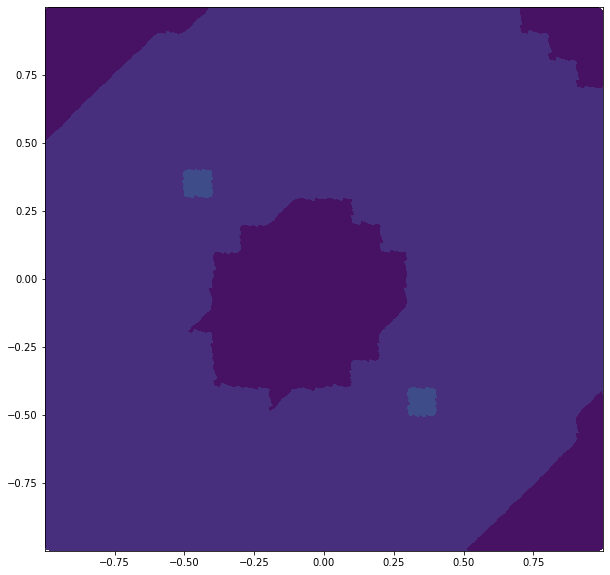

In [4]:
ani, fig = plot.create_animation_output_dir(problem.output_dir, eqn=0);
HTML(ani.to_html5_video())

In [52]:
num_moments = 0
gravity_constant = 1.0
kinematic_viscosity = 0.0
slip_length = 0.0

problem = swlme_se.SmoothExample( 
    num_moments, 
    gravity_constant, 
    kinematic_viscosity, 
    slip_length
)

time_final = 0.5
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

space_time_order = 1
problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["is_verbose"] = True
problem.parameters["time_stepping"]["num_frames"] = 10
problem.parameters["time_stepping"]["order"] = space_time_order

x_left = -1.0
x_right = 1.0
y_bottom = -1.0
y_top = 1.0
num_rows = 20
num_cols = 20
problem.parameters["mesh"]["mesh_class"] = "mesh_2d_meshgen_dogpack"
problem.parameters["mesh"]["input_dir"] = "mesh_output_20"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right
problem.parameters["mesh"]["y_bottom"] = y_bottom
problem.parameters["mesh"]["y_top"] = y_top
problem.parameters["mesh"]["num_rows"] = num_rows
problem.parameters["mesh"]["num_cols"] = num_cols

problem.parameters["basis"]["basis_class"] = "modal_2d_triangle"
problem.parameters["basis"]["inner_product_constant"] = 0.5
problem.parameters["basis"]["space_order"] = space_time_order

problem.parameters["boundary_condition"]["boundary_condition_class"] = "dirichlet"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

cfl = 0.5
delta_x = (x_right - x_left) / num_cols
delta_y = (y_top - y_bottom) / num_rows
hypotonuse = np.sqrt(delta_x * delta_x + delta_y * delta_y)
face_area = max(delta_x, delta_y, hypotonuse)
elem_vol = 0.5 * delta_x * delta_y
delta_t = float(dg_utils.get_delta_t(cfl, problem.max_wavespeed, face_area, elem_vol))
problem.parameters["delta_t"] = delta_t

problem._setup_objects()

In [59]:
final_solution = main.run(problem)

10.0%
Will finish in 0:00:46.643481 at 20:03:31.450788
20.0%
Will finish in 0:00:43.716024 at 20:03:34.269728
30.0%
Will finish in 0:00:37.768393 at 20:03:33.579545
40.0%
Will finish in 0:00:32.000844 at 20:03:32.959438
50.0%
Will finish in 0:00:27.097456 at 20:03:33.819610
60.0%
Will finish in 0:00:21.513841 at 20:03:33.409301
70.0%
Will finish in 0:00:16.068400 at 20:03:33.186031
80.0%
Will finish in 0:00:10.654549 at 20:03:32.897445
90.0%
Will finish in 0:00:05.306163 at 20:03:32.686327
100.0%
Will finish in 0:00:00 at 20:03:32.900963


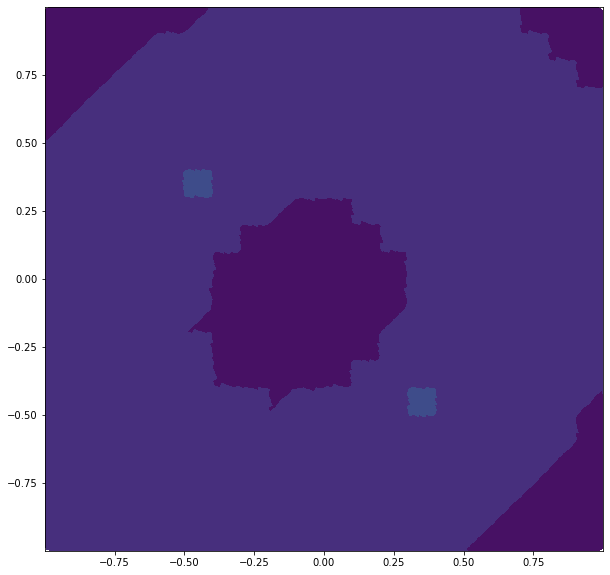

In [60]:
ani, fig = plot.create_animation_output_dir(problem.output_dir, eqn=0);
HTML(ani.to_html5_video())

In [20]:
mesh_tr = problem.mesh_

In [53]:
mesh_md = problem.mesh_

In [25]:
mesh_tr

In [26]:
mesh_md

In [31]:
mesh_tr.vertices[1]

array([-0.9, -1. ])

In [33]:
mesh_md.vertices[2]

array([-0.7, -0.9])

In [35]:
mesh_md.elems[0]

array([ 0, 20, 19])

In [40]:
mesh_md.faces_to_elems

array([[648, 649],
       [799, 648],
       [798, 799],
       ...,
       [ -1, 721],
       [ -1, 723],
       [ -1, 725]])

In [54]:
mesh_md.check_face_orientation(0)

True

In [43]:
mesh_md.faces[0]

array([361,   0])

In [44]:
mesh_md.normal_vector(0)

array([-0.70710678,  0.70710678])

In [45]:
mesh_.vertices[mesh_.faces[0]]

array([[-1. , -1. ],
       [-0.9, -0.9]])

In [57]:
temp = [mesh_md.check_face_orientation(i_face) for i_face in range(mesh_.num_faces)]
np.all(temp)

True

In [62]:
basis_ = problem.basis_

In [68]:
basis_.canonical_element_.transform_to_canonical_jacobian(mesh_md, 4)

array([[-20.,  20.],
       [  0., -20.]])

In [71]:
mesh_md.vertices[mesh_.faces[1]]

array([[-1. , -0.9],
       [-0.9, -0.9]])